In [1]:
import numpy as np
import math
from scipy.special import comb
import matplotlib.pyplot as plt


# Exercise 1
(b) Come up with a general formula to calculate and/or code
a simulation for the probability that c doctors with competence p
make the correct decision by majority voting. Use it to calculate the
probability of a correct decision for the group of medical students.

### Condorcet's Jury Theorem:

$P(N,p) = \sum_{k = \frac{N}{2}}^{N} \binom{N}{k}\cdot p^k \cdot (1-p)^{N-k}$, where the probability of the right choice is $p$ and $N$ is the number of voters. Additonially, we assume that $k>2$ and that $k$ is odd to avoid ties. The theorem states if the voters are independent and the probability of voting for the correct choice for each voter is $p>0.5$, then the probability of the majority vote for the correct choice is larger than $p$ and converges to one as the population $N$ goes to infinity.

In [2]:
c = 19
p = 0.6

def PcorrectMajority(c,p):
    q = 0.0
    for k in range(math.ceil(c/2),c):
        q = q + (comb(c, k, exact=False) * p**k * (1-p)**(c-k))
    return q

print("p(19,0.6) = ", PcorrectMajority(c,p))

p(19,0.6) =  0.8138470426105872


(c) Make a graph of the probability of a correct decision for
various sizes of the jury and different competence levels (p) of the
individual doctors.

In [3]:
def createProbMatrix(jurySizes, competenceLevels):
    graph = np.empty([len(jurySizes), len(competenceLevels)])
    for i in range(0,len(jurySizes)):
        for j in range(0,len(competenceLevels)):
            graph[i][j] = PcorrectMajority(jurySizes[i], competenceLevels[j])
    return graph

In [4]:
def plotHeatmap(x, y, xy):
    fig, ax = plt.subplots()
    im = ax.imshow(xy, aspect='auto')

    # Set ticks
    ax.set_xticks(np.arange(len(x)))
    ax.set_yticks(np.arange(len(y)))
    
    # label them 
    ax.set_xticklabels(list(map('{:.2f}'.format,x)))
    ax.set_yticklabels(y)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    
    ax.set_xticks(np.arange(xy.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(xy.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
        
    # Create text annotations
    for i in range(len(y)):
        for j in range(len(x)):
            text = ax.text(j, i, "{:.2f}".format(xy[i, j]),
                           ha="center", va="center", color="w")

    ax.set_title("Probabilities of a correct decisions")
    ax.set_xlabel("Competence level p")
    ax.set_ylabel("Jury size c")
    fig.tight_layout()
    plt.show()

In [5]:
def graphCorrectDecision(minSize, maxSize, stepSize, minP, maxP, stepP):
    jurySizes = range(minSize,maxSize + stepSize,stepSize)
    competenceLevels = np.arange(minP, maxP + stepP, stepP)
    graph = createProbMatrix(jurySizes, competenceLevels)
    plotHeatmap(competenceLevels,jurySizes, graph)

Creating multiple graphs with varying jury size and competence levels

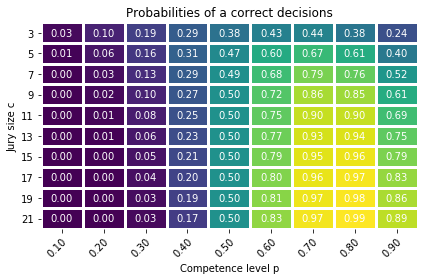

In [6]:
graphCorrectDecision(3, 21, 2, 0.1, 0.9, 0.1)